**Taliya Meyswara (A11.2022.14163) - A11.43UG1**

## **Estimasi Harga Baru Berdasarkan Harga dari Kompetitor Menggunakan Model <font color=slate>Regresi Linier Berganda</font>**
Penggunaan model regresi linier berganda untuk mengestimasi harga terbaru dari produk pada perusahaan retail yang memungkinkan perusahaan untuk mengerti bagaimana harga produk dari pesaing dapat mempengaruhi harga produk mereka. Sehingga perusahaan dapat mengestimasi harga produk baru untuk memaksimalkan profit dan merespons harga dari pesaing. 

### **Content** 📝
<!-- - 

- [<font color=slate>Visualisasi Data</font>](#visualisasi-data)
[<font color=slate>Eksplorasi Data</font>](#eksplorasi-data)
3.   Data Preprocessing
4.   Modelling
5.   Evaluasi
6.   Streamlit
7.   Kesimpulan -->
<!-- <font color=slate> -->
<!-- [Pengumpulan Data](#pengumpulan-data)  
[Visualisasi Data](#visualisasi-data)   -->
1. [<font color=slate>Pengumpulan Data</font>](#pengumpulan-data)   

2. [<font color=slate>Visualisasi Data</font>](#visualisasi-data)  
3. [<font color=slate>Modelling</font>](#modelling)  
4. [<font color=slate>Evaluasi Model</font>](#evaluasi-model)    
5. [<font color=slate>Hasil Estimasi</font>](#hasil-estimasi) 
6. [<font color=slate>Streamlit</font>](#save-model) 
7. [<font color=slate>Kesimpulan</font>](#hasil-estimasi) 
<!-- </font> -->

<!-- ## <font color=#56b6c2>**Pengumpulan Data**</font> -->
## **Pengumpulan Data**
Data yang digunakan merupakan *dataset private* yang diperoleh dari dua perusahaan retail yang ada di Kota Semarang. Data mencakup informasi mengenai nama produk, harga produk saat ini, harga produk dari pesaing, dan harga baru yang telah ditetapkan. 

Berikut adalah tautan dari dataset yang digunakan : [<font color=orange>**product_price.csv**</font>](https://drive.google.com/file/d/1niwwd-Xa0rISgNWfD1bTnU_F8JXGBeZC/view?usp=sharing)

### **Library 🎨**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset** 📄

In [22]:
df = pd.read_csv('product_price.csv') # Import dataset
print("Jumlah data (baris, kolom):", df.shape) # Mengetahui jumlah baris dan kolom data
df.head() # Menampilkan data

Jumlah data (baris, kolom): (6911, 4)


,Product Name,Current Price,Competitor Price,New Price
0,DUA KELINCI SUKRO ORI 100G,368000,316700,316700
1,DUA KELINCI SUKRO ORIGINAL 10X20GR,49200,49000,49000
2,DUA KELINCI TICTAC 10x16GR,54000,49200,49200
3,ENERGEN CEREAL CHOC RCG 10X34 G,267600,267700,267600
4,ENERGEN CEREAL KC IJO RCG 10X35 G,267600,267700,267600


Penjelasan setiap kolom atribut:
-   Product Name : Nama produk

-   Current Price : Harga produk saat ini (harga dari perusahaan)
-   Competitor Price : Harga produk dari perusahaan kompetitor
-   New Price : Harga baru yang telah ditetapkan

## **Visualisasi Data**
Mendeskripsikan data, eksplorasi data, distribusi data, dan mengecek korelasi antar atribut

### **Deskripsi Data**🪄
Data Memiliki 6199 baris dan 4 atribut. Variable bebas disini adalah atribut Current Price dan Competitor Price sedangkan variabel terikatnya atau labelnya adalah atribut New Price

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6911 entries, 0 to 6910
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      6911 non-null   object
 1   Current Price     6911 non-null   int64 
 2   Competitor Price  6911 non-null   int64 
 3   New Price         6911 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 216.1+ KB


Dapat dilihat bahwa atribut yang ditentukan sebagai variabel sudah berupa numerik semua

In [24]:
df.describe()

,Current Price,Competitor Price,New Price
count,6.911000e+03,6.911000e+03,6.911000e+03
mean,2.380434e+05,2.357397e+05,2.348412e+05
std,2.065559e+05,2.041729e+05,2.029448e+05
min,1.275000e+04,1.250000e+04,1.200000e+04
25%,1.075000e+05,1.050000e+05,1.059000e+05
50%,1.864000e+05,1.800000e+05,1.849500e+05
75%,2.871000e+05,2.862000e+05,2.820000e+05
max,2.515500e+06,2.510000e+06,2.515500e+06


### **Eksplorasi Data**🪄
Mengecek missing value

Product Name        0
Current Price       0
Competitor Price    0
New Price           0
dtype: int64

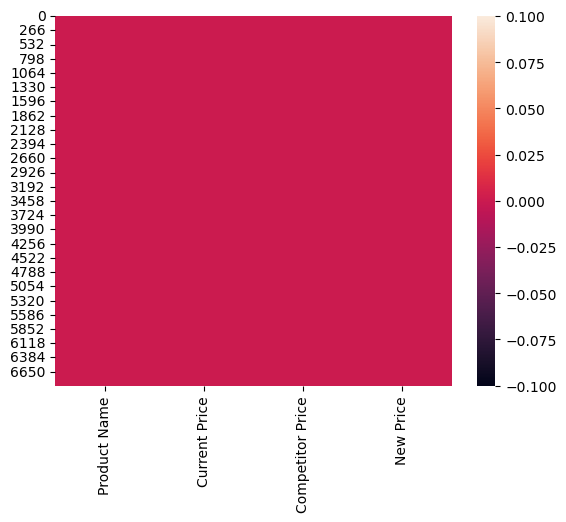

In [25]:
sns.heatmap(df.isnull())
df.isnull().sum() # Jumlah missing value

Hasil menunjukkan bahwa pada data tidak terdapat missing value, sehingga tidak perlu melakukan normalisasi

### **Distribusi Current Price**🪄

/var/folders/cc/fc8j01v5641fx1tc6_mmqfjc0000gn/T/ipykernel_3906/1027813661.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Current Price'])


<Axes: xlabel='Current Price', ylabel='Density'>

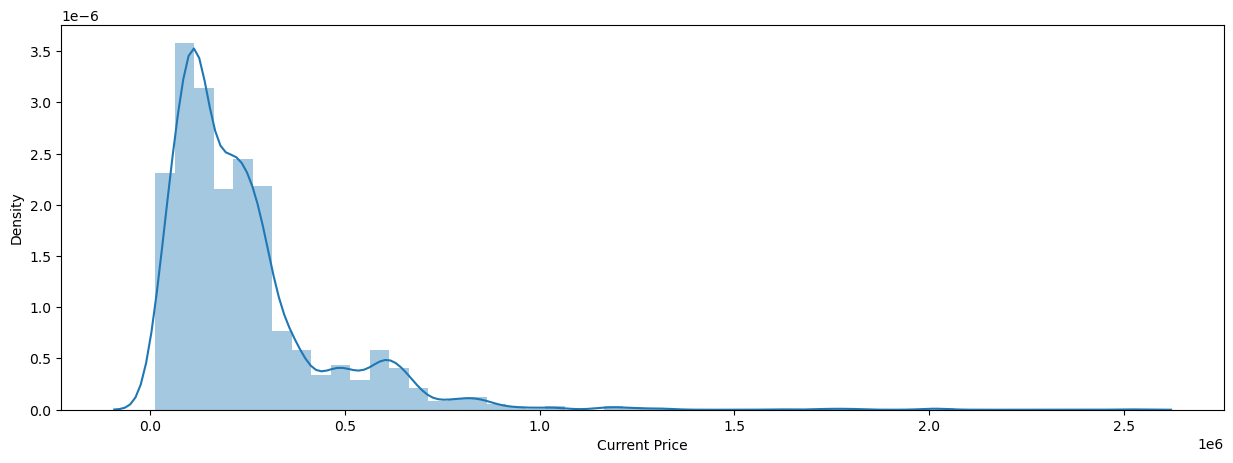

In [26]:
plt.figure(figsize=(15,5))
sns.distplot(df['Current Price'])


### **Distribusi Competitor Price**🪄

/var/folders/cc/fc8j01v5641fx1tc6_mmqfjc0000gn/T/ipykernel_3906/509513362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Competitor Price'])


<Axes: xlabel='Competitor Price', ylabel='Density'>

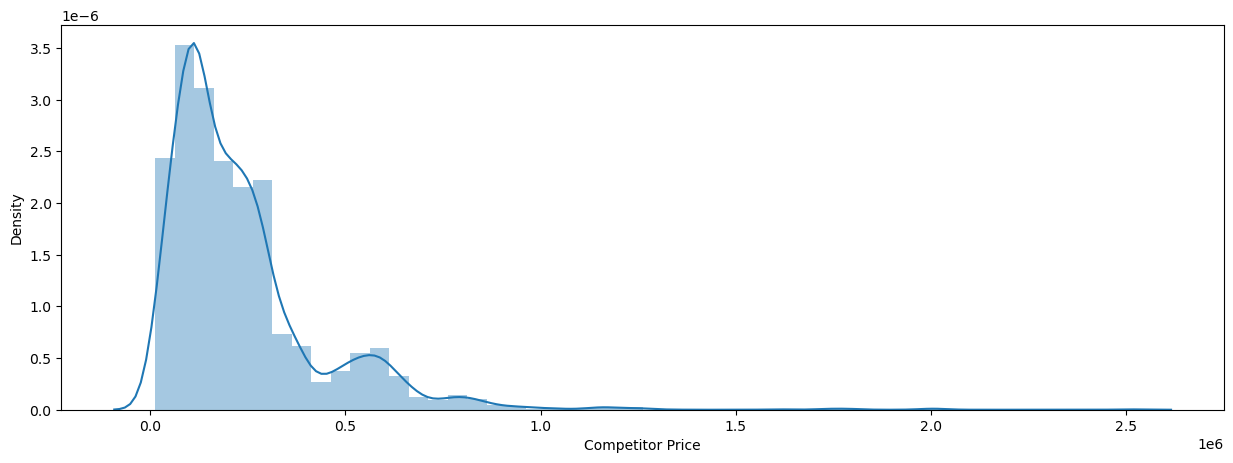

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(df['Competitor Price'])

### **Plot Hubungan Antara Current Price dan Competitor Price**🪄

/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

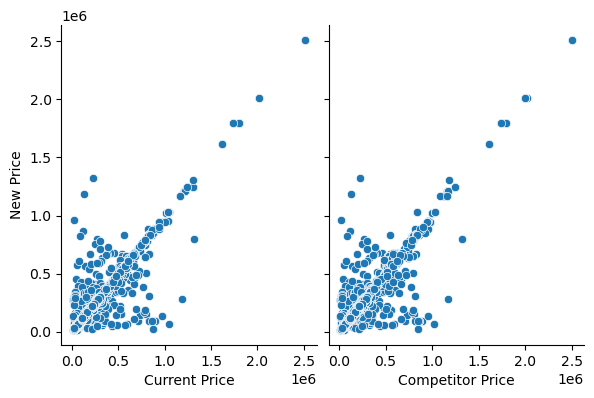

In [28]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Current Price', 'Competitor Price'], y_vars=['New Price'], height=4, aspect=0.75)

Dapat dilihat bahwa terdapat kecenderungan atau hubungan positif antara variabel current price dan competitor price. Berarti ketika nilai dari current price dan competitor meningkat, makan nilai dari new price cenderung juga meningkat.

### **Cek Korelasi Antar Atribut**🪄
Cek apakah atribut memiliki hubungan satu sama lain

                  Current Price  Competitor Price  New Price
Current Price          1.000000          0.995003   0.947937
Competitor Price       0.995003          1.000000   0.946783
New Price              0.947937          0.946783   1.000000


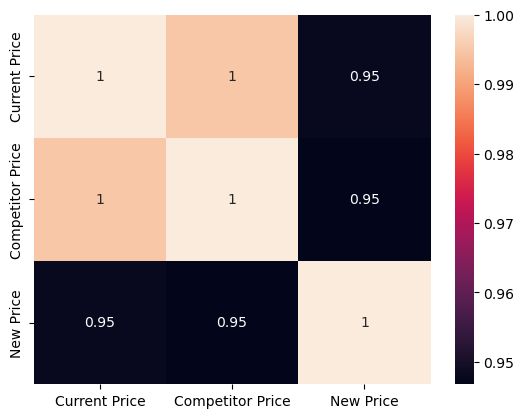

In [29]:
# cek korelasi antar variable
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
print(numeric_df.corr())

### **Seleksi Atribut**🪄
Menentukan atribut apa saja yang akan digunakan. Kemudian membagi variabel menjadi x dan y.

In [30]:
features = ['Current Price', 'Competitor Price']
x = df[features]
y = df['New Price']
x.shape, y.shape

((6911, 2), (6911,))

## **Modelling**
Menggunakan model regresi linier berganda di mana persamaanya adalah sebagai berikut:
### ${Y = a + b1 X1 + b2 X2 + .... + bn Xn}$

Keterangan:
-   Y = Variabel terikat

-   a = Intercept/Konstanta
-   b = Koefisien
-   X = Variabel bebas

### **Split Data**✂️
Membagi data ke dalam data training dan data testing

In [31]:
# Memanggil model dari sklearn yang digunakan untuk split data
from sklearn.model_selection import train_test_split

# Mengambil data testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(5183, 2)
(5183,)
(1728, 2)
(1728,)


### **Membuat Model Regresi Linier**⚗️

In [32]:
# Memanggil model dari sklearn yang digunakan untuk regresi
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()

# Train model dengan training data
lr.fit(x_train,y_train)

# Untuk prediksi
pred = lr.predict(x_test)

# Data training sudah berhasil diolah menggunakan model regresi linier

### **Mencari nilai koefisien (b) dan intercept (a)**

In [33]:
# Koefisien (b)
coef_dict ={
    'features': x.columns,
    'coef_value': lr.coef_
}

coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Current Price,0.568937
1,Competitor Price,0.364164


In [34]:
# Intercept (a)
print(lr.intercept_)

12885.33806335504


dari nilai a dan b yang di dapat, jika dimasukkan ke dalam persamaan regresi linier berganda maka hasilnya adalah:
### ${Y = 12885.33806335504 + 0.568937X1 + 0.364164X2}$

**Keterangan:**
-   Y = New Price
-   **X1 = Current Price**

    Memiliki nilai positif sebesar 0.568937. Hal ini menunjukkan jika X1 mengalami kenaikan 1, maka Y akan naik sebesar 0.568937 dengan asumsi variabel independen lainnya dianggap konstan. Tanda positif artinya menunjukkan pengaruh yang searah antara variabel independen dan variabel dependen.

-   **X2 = Competitor Price**

    Memiliki nilai positif sebesar 0.364164. Hal ini menunjukkan jika X2 mengalami kenaikan 1, maka Y akan naik sebesar 0.364164 dengan asumsi variabel independen lainnya dianggap konstan. Tanda positif artinya menunjukkan pengaruh yang searah antara variabel independen dan variabel dependen.

-   **Nilai Konstanta (a)**

    Nilai konstanta (a) memiliki nilai positif sebesar 12885.33806335504. Tanda positif artinya menunjukkan pengaruh yang searah antara variabel independen dan variabel dependen. Hal ini menunjukkan bahwa jika semua variabel independen yang meliputi X1, dan X2, bernilai 0, maka Y secara rata-rata adalah 12885.33806335504. 


**<font color=slate>Karena semua koefisien dalam model regresi bernilai positif, hal tersebut menunjukkan bahwa kenaikan nilai setiap variabel bebas (harga saat ini dan harga kompetitor) akan menyebabkan peningkatan nilai variabel terikat (harga baru). </font>**

## **Evaluasi Model**
***
Mengecek MSE dan R²

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import math
y_pred=lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 4078034352.348392
Root Mean Squared Error: 63859.48913316166
R^2 Score: 0.8996634586236606


#### **👉 Intepretasi Hasil Evaluasi Model**
-   Mean Squared Error (MSE) sebesar 4078034352.348392 menunjukkan tingkat kesalahan rata-rata kuadrat dari model. Semakin rendah MSE, semakin baik performa model.

-   R² Score sebesar 0.8996634586236606 mengindikasikan bahwa sekitar 89.97% variabel bebas dapat menjelaskan keragaman model. Sedangkan 10,03% lainnya dipengaruhi oleh faktor-faktor lain di luar variabel terikat.

## **Hasil Estimasi**
Menguji Model, membandingkan hasil, dan plot estimasi

### **Menguji Model** 🔭
Input Estimasi

In [36]:
# Current Price = 368000
# Competitor Price = 316700
input_data = np.array([[368000, 316700]])

prediction = lr.predict(input_data)
print('Estimasi harga baru produk: ', prediction)

Estimasi harga baru produk:  [337584.89563036]


/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Perbandingan Hasil Awal dan Hasil Estimasi** 🔭

In [37]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Estimated Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:10]

,Actual Value,Estimated Value,Difference
4726,276000,281892.416400,-5892.416400
4602,152400,211936.018841,-59536.018841
3076,99000,108084.337644,-9084.337644
6819,222000,211635.867203,10364.132797
6706,223200,238414.218867,-15214.218867
4954,182500,268008.786091,-85508.786091
1889,101850,102532.048184,-682.048184
2244,134400,138294.122647,-3894.122647
3155,153000,158927.283063,-5927.283063
2933,61008,69995.507397,-8987.507397


### **Hasil Plot** 📊

Text(0.5, 1.0, 'Actual vs Predicted')

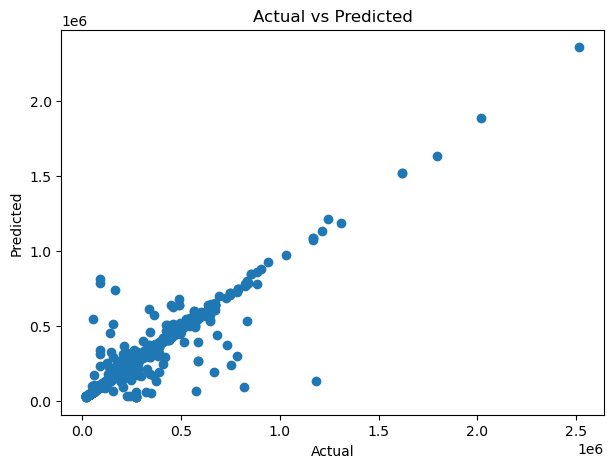

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## **Save Model**
Digunakan untuk membuat aplikasi menggunakan streamlit.

In [39]:
import pickle
filename = 'estimasi_harga.sav'
pickle.dump(lr,open(filename,'wb'))

## **Kesimpulan**
Kesimpulan dari penggunaan model regresi linier berganda untuk mengestimasi harga baru produk berdasarkan harga dari kompetitor yaitu
dengan melihat tingginya akurasi model (R² Score yang tinggi) maka perusahaan dapat menggunakan hasil model ini sebagai dasar untuk mengembangkan strategi harga yang lebih baik, yang memungkinkan mereka untuk membuat keputusan harga yang lebih strategis untuk meningkatkan profit, serta merespon harga dari kompetitor.